In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io
import os
import matplotlib as mpl

mpl.rcParams['font.size']=14

In [2]:
sc_num_cs_dist = np.zeros((50, 25))
sc_num_vs_dist = np.zeros((50, 25))

directory_ori = '/data/keeling/a/xx24/d/proj_film/default/'
for subdir, dirs, files in os.walk(directory_ori):
    for file in files:
        filename = subdir + os.sep + file
        if ("urban_plume_000000" in filename) and ("_process.nc") in filename:
            i = int(filename[-13:-11])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            sc_edges = ncf.variables["sc_edges"].data.copy() * 100   
            bin_width = np.log(sc_edges[1]/sc_edges[0])
            sc_num_cs_dist[:, i-1] = bin_width * ncf.variables["sc_dist"].data.copy()
            sc_num_vs_dist[:, i-1] = bin_width * ncf.variables["sc_varying_sigma_dist"].data.copy()

In [3]:
lower_num_cs_dist = np.zeros((50, 25))
lower_num_vs_dist = np.zeros((50, 25))

directory_ori = '/data/keeling/a/xx24/d/proj_film/lower/'
for subdir, dirs, files in os.walk(directory_ori):
    for file in files:
        filename = subdir + os.sep + file
        if ("urban_plume_000000" in filename) and ("_process.nc") in filename:
            i = int(filename[-13:-11])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            sc_edges = ncf.variables["sc_edges"].data.copy() * 100   
            bin_width = np.log(sc_edges[1]/sc_edges[0])
            lower_num_cs_dist[:, i-1] = bin_width * ncf.variables["sc_dist"].data.copy()
            lower_num_vs_dist[:, i-1] = bin_width * ncf.variables["sc_varying_sigma_dist"].data.copy()

upper_num_cs_dist = np.zeros((50, 25))
upper_num_vs_dist = np.zeros((50, 25))
directory_ori = '/data/keeling/a/xx24/d/proj_film/upper/'
for subdir, dirs, files in os.walk(directory_ori):
    for file in files:
        filename = subdir + os.sep + file
        if ("urban_plume_000000" in filename) and ("_process.nc") in filename:
            i = int(filename[-13:-11])
            ncf = scipy.io.netcdf_file(filename, mmap=False)
            sc_edges = ncf.variables["sc_edges"].data.copy() * 100   
            bin_width = np.log(sc_edges[1]/sc_edges[0])
            upper_num_cs_dist[:, i-1] = bin_width * ncf.variables["sc_dist"].data.copy()
            upper_num_vs_dist[:, i-1] = bin_width * ncf.variables["sc_varying_sigma_dist"].data.copy()

In [4]:
tot_num  = np.sum(sc_num_cs_dist, axis=0)
nc_cs_1  = np.sum(sc_num_cs_dist[:13,:],axis=0)
nc_cs_3  = np.sum(sc_num_cs_dist[:19,:],axis=0)
nc_cs_6  = np.sum(sc_num_cs_dist[:22,:],axis=0)
nc_cs_10 = np.sum(sc_num_cs_dist[:25,:],axis=0)

nc_vs_1  = np.sum(sc_num_vs_dist[:13,:],axis=0)
nc_vs_3  = np.sum(sc_num_vs_dist[:19,:],axis=0)
nc_vs_6  = np.sum(sc_num_vs_dist[:22,:],axis=0)
nc_vs_10 = np.sum(sc_num_vs_dist[:25,:],axis=0)

rel_err_1 = 100*(nc_cs_1 - nc_vs_1) / nc_vs_1
rel_err_3 = 100*(nc_cs_3 - nc_vs_3) / nc_vs_3
rel_err_6 = 100*(nc_cs_6 - nc_vs_6) / nc_vs_6
rel_err_10 = 100*(nc_cs_10 - nc_vs_10) / nc_vs_10

In [5]:
lower_cs_1 = np.sum(lower_num_cs_dist[:13,:],axis=0)
lower_cs_3 = np.sum(lower_num_cs_dist[:19,:],axis=0)
lower_cs_6 = np.sum(lower_num_cs_dist[:22,:],axis=0)
lower_cs_10 = np.sum(lower_num_cs_dist[:25,:],axis=0)

lower_vs_1 = np.sum(lower_num_vs_dist[:13,:],axis=0)
lower_vs_3 = np.sum(lower_num_vs_dist[:19,:],axis=0)
lower_vs_6 = np.sum(lower_num_vs_dist[:22,:],axis=0)
lower_vs_10 = np.sum(lower_num_vs_dist[:25,:],axis=0)

lower_rel_err_1 = 100*(lower_cs_1 - lower_vs_1) / lower_vs_1
lower_rel_err_3 = 100*(lower_cs_3 - lower_vs_3) / lower_vs_3
lower_rel_err_6 = 100*(lower_cs_6 - lower_vs_6) / lower_vs_6
lower_rel_err_10 = 100*(lower_cs_10 - lower_vs_10) / lower_vs_10

In [6]:
upper_cs_1 = np.sum(upper_num_cs_dist[:13,:],axis=0)
upper_cs_3 = np.sum(upper_num_cs_dist[:19,:],axis=0)
upper_cs_6 = np.sum(upper_num_cs_dist[:22,:],axis=0)
upper_cs_10 = np.sum(upper_num_cs_dist[:25,:],axis=0)

upper_vs_1 = np.sum(upper_num_vs_dist[:13,:],axis=0)
upper_vs_3 = np.sum(upper_num_vs_dist[:19,:],axis=0)
upper_vs_6 = np.sum(upper_num_vs_dist[:22,:],axis=0)
upper_vs_10 = np.sum(upper_num_vs_dist[:25,:],axis=0)

upper_rel_err_1 = 100*(upper_cs_1 - upper_vs_1) / upper_vs_1
upper_rel_err_3 = 100*(upper_cs_3 - upper_vs_3) / upper_vs_3
upper_rel_err_6 = 100*(upper_cs_6 - upper_vs_6) / upper_vs_6
upper_rel_err_10 = 100*(upper_cs_10 - upper_vs_10) / upper_vs_10

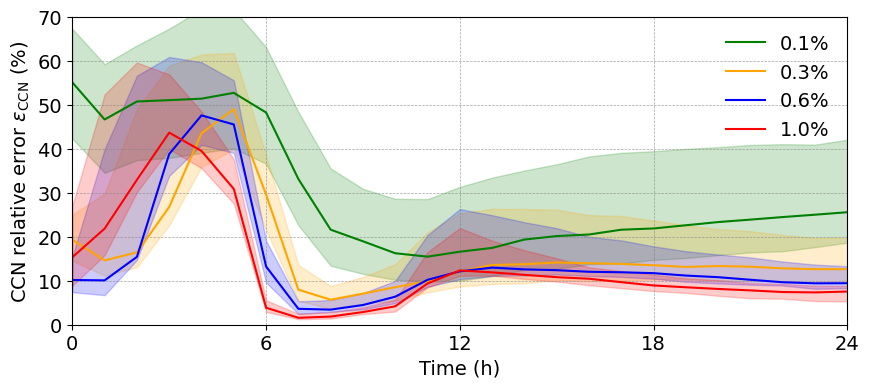

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(np.linspace(0,24, 25), -rel_err_1, label='0.1%', c='green')
ax.fill_between(np.linspace(0,24, 25), -lower_rel_err_1, -upper_rel_err_1, color='green', alpha=0.2)
ax.plot(np.linspace(0,24, 25), -rel_err_3, label='0.3%', c='orange')
ax.fill_between(np.linspace(0,24, 25), -lower_rel_err_3, -upper_rel_err_3, color='orange', alpha=0.2)
ax.plot(np.linspace(0,24, 25), -rel_err_6, label='0.6%', c='blue')
ax.fill_between(np.linspace(0,24, 25), -lower_rel_err_6, -upper_rel_err_6, color='blue', alpha=0.2)
ax.plot(np.linspace(0,24, 25), -rel_err_10, label='1.0%', c='red')
ax.fill_between(np.linspace(0,24, 25), -lower_rel_err_10, -upper_rel_err_10, color='red', alpha=0.2)


ax.set_xlim(0, 24)
ax.set_ylim(0, 70)
ax.set_xticks([0, 6, 12, 18, 24])
ax.legend(frameon=False)
ax.set_xlabel('Time (h)')
ax.set_ylabel(r'CCN relative error $\varepsilon_{\rm CCN}$ (%)')
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# plt.savefig('/data/keeling/a/xx24/d/proj_film/CCN_rel_err_time_series.pdf', bbox_inches='tight',dpi=300)

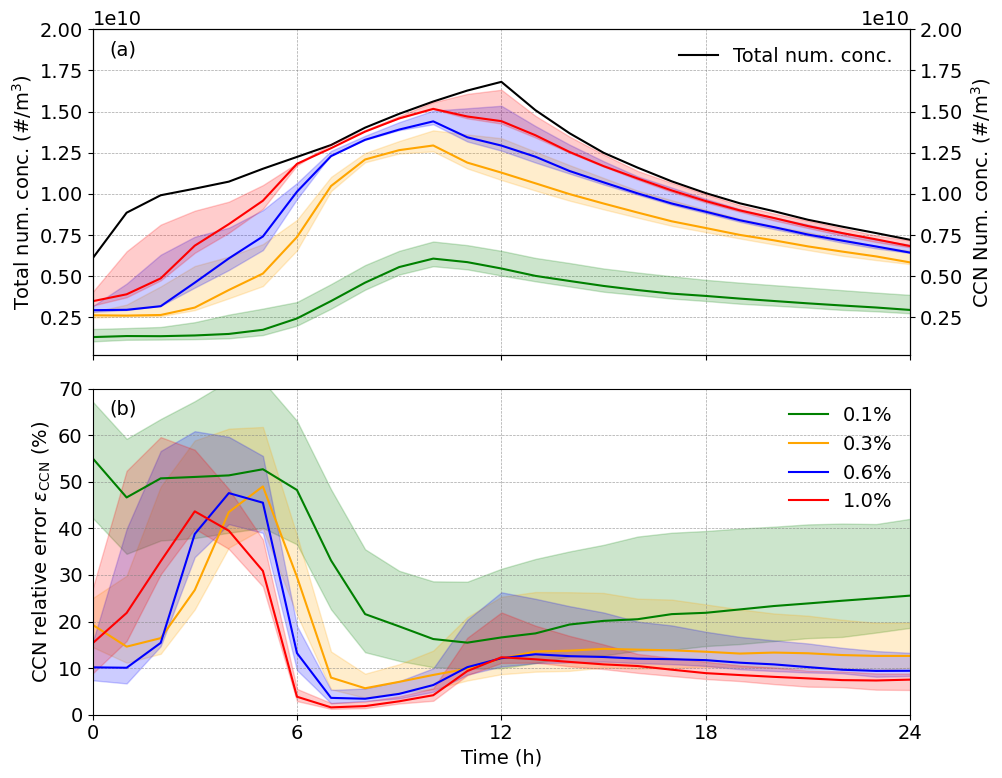

In [16]:
fig, axes = plt.subplots(2,1,figsize=(10, 8),sharex=True)

axes[0].plot(np.linspace(0,24, 25), tot_num, c='k', label='Total num. conc.')
axes[0].set_ylabel('Total num. conc. (#/m$^3$)')
axes[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
axes[0].set_ylim(2e8, 2e10)
axes[0].legend(frameon=False, loc='upper right')

axes_y = axes[0].twinx()
axes_y.plot(np.linspace(0,24, 25), nc_vs_1, label='0.1%', c='green')
axes_y.fill_between(np.linspace(0,24, 25), lower_vs_1, upper_vs_1, color='green', alpha=0.2)
axes_y.plot(np.linspace(0,24, 25), nc_vs_3, label='0.3%', c='orange')
axes_y.fill_between(np.linspace(0,24, 25), lower_vs_3, upper_vs_3, color='orange', alpha=0.2)
axes_y.plot(np.linspace(0,24, 25), nc_vs_6, label='0.6%', c='blue')
axes_y.fill_between(np.linspace(0,24, 25), lower_vs_6, upper_vs_6, color='blue', alpha=0.2)
axes_y.plot(np.linspace(0,24, 25), nc_vs_10, label='1.0%', c='red')
axes_y.fill_between(np.linspace(0,24, 25), lower_vs_10, upper_vs_10, color='red', alpha=0.2)

axes_y.set_ylim(2e8, 2e10)
axes_y.set_ylabel('CCN Num. conc. (#/m$^3$)')
axes_y.annotate('(a)',xy=(0.02, 0.92), xycoords='axes fraction')
# axes_y.legend(frameon=False, loc='upper right')
# axes_y.set_yscale('log')

axes[1].plot(np.linspace(0,24, 25), -rel_err_1, label='0.1%', c='green')
axes[1].fill_between(np.linspace(0,24, 25), -lower_rel_err_1, -upper_rel_err_1, color='green', alpha=0.2)
axes[1].plot(np.linspace(0,24, 25), -rel_err_3, label='0.3%', c='orange')
axes[1].fill_between(np.linspace(0,24, 25), -lower_rel_err_3, -upper_rel_err_3, color='orange', alpha=0.2)
axes[1].plot(np.linspace(0,24, 25), -rel_err_6, label='0.6%', c='blue')
axes[1].fill_between(np.linspace(0,24, 25), -lower_rel_err_6, -upper_rel_err_6, color='blue', alpha=0.2)
axes[1].plot(np.linspace(0,24, 25), -rel_err_10, label='1.0%', c='red')
axes[1].fill_between(np.linspace(0,24, 25), -lower_rel_err_10, -upper_rel_err_10, color='red', alpha=0.2)

axes[1].set_xlim(0, 24)
axes[1].set_ylim(0, 70)
axes[1].set_xticks([0, 6, 12, 18, 24])
axes[1].legend(frameon=False)
axes[1].set_xlabel('Time (h)')
axes[1].set_ylabel(r'CCN relative error $\varepsilon_{\rm CCN}$ (%)')
axes[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
axes[1].annotate('(b)',xy=(0.02, 0.92), xycoords='axes fraction')

plt.tight_layout()
plt.savefig('/data/keeling/a/xx24/d/proj_film/CCN_rel_err_time_series.pdf', bbox_inches='tight',dpi=300)